In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [86]:
# Acquire
df = pd.read_csv("./employee_attrition_performance.csv")

In [87]:
df.shape

(1470, 35)

In [92]:
# Determine if columns provide no new information
# A column provides no new information if all of the values are the same
columns_to_drop = []

for column in df.columns:
    # If the number of different values is the same as 
    if df[column].value_counts().shape[0] == 1:
        columns_to_drop.append(column)
    
for column in columns_to_drop:
    print(df[column].head(1))
    
# Looks like every employee is over18, works 80 works per pay period, and the EmployeeCount number is 1 for everybody.

# Drop columns that don't add any new information
# Everyone is over 18
# Everyone has 80 standard hours
# The employee count adds no new information

# df = df.drop(columns=["Over18", "StandardHours", "EmployeeCount"])
df = df.drop(columns=columns_to_drop)

0    1
Name: EmployeeCount, dtype: int64
0    Y
Name: Over18, dtype: object
0    80
Name: StandardHours, dtype: int64


In [60]:
# Train, Validate, Test Split
# Stratify on Attrition column (for MVP)
train_validate, test = train_test_split(df, stratify=df.Attrition)
train, validate = train_test_split(train_validate, stratify=train_validate.Attrition)

train.set_index("EmployeeNumber", inplace=True)
validate.set_index("EmployeeNumber", inplace=True)
test.set_index("EmployeeNumber", inplace=True)

In [61]:
train.head(3).T

EmployeeNumber,2000,248,307
Age,47,41,38
Attrition,No,Yes,No
BusinessTravel,Non-Travel,Travel_Rarely,Travel_Rarely
DailyRate,1162,1356,119
Department,Research & Development,Sales,Sales
DistanceFromHome,1,20,3
Education,1,2,3
EducationField,Medical,Marketing,Life Sciences
EmployeeCount,1,1,1
EnvironmentSatisfaction,3,2,1


### Continuous Valued Features
- Age
- DailyRate
- DistanceFromHome
- HourlyRate
- MonthlyIncome (is this a multiple of their rate * hours or something else?)
- MonthlyRate
- PercentSalaryHike
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

### Categorical Features
- Attrition (yes or no)
- BusinessTravel (none, rarely, frequently)
- Department (R&D, Sales, HR)
- Education (1-5)
- EducationField (6 categories)
- EnvironmentSatisfaction (1-4)
- Gender (this data has a binary)
- JobInvolvement (1-4)
- JobLevel (1 through 5)
- JobRole (9 different job role names)
- Job Satisfaction (1 - 4)
- MaritalStatus (single, married, divorced)
- NumCompaniesWorked
- OverTime (yes or no)
- PerformanceRating (3 or 4)
- RelationshipSatisfaction (1 through 4)
- StockOptionLevel (0 through 3)
- TrainingTimesLastYear(0 through 6)
- WorkLifeBalance (1 - 4)

## Some Ideas/Approaches/Questions
- Hypothesis Testing:
    - Set my alpha and run a $chi^2$ for every discrete columnn vs. attrition
    - Is there a chi-squared "equivalent" of ANOVA? 
    - what's the appropriate tool for ordinal/discrete values that tests for independence?
    - Would https://en.wikipedia.org/wiki/Cochran%E2%80%93Armitage_test_for_trend be useful/revelatory here?
    - T-test every continuous value vs. attrition status
- The process automation from above might make for a nice utility function or start of a module

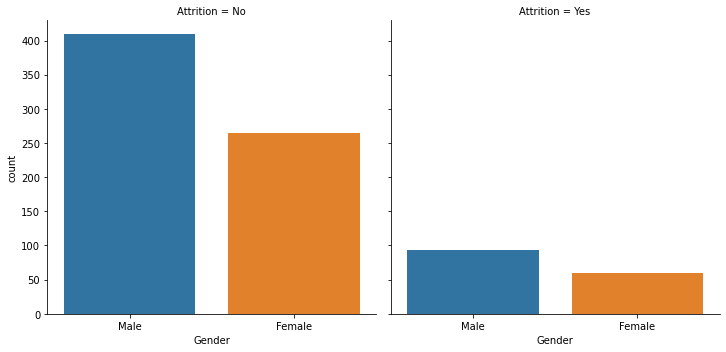

In [34]:
sns.catplot(x="Gender", col="Attrition", data=train, kind="count")